## Intro to Scikit-learn (sklearn)

This notebook demos some useful functions of scikit-learn library

0. end-to-end sklearn workflow
1. Getting the data ready
2. Choose the rigth estimator/algorithm 
3. fit the model/alogrithm and use to make predictions on data
4. evaluate a model
5. improve a model
6. save and load a trained model
7. put it all together

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. get the data ready
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (features matrix)
x = heart_disease.drop("target",axis=1)

# create Y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [6]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [8]:
Y_test

98     1
29     1
3      1
76     1
136    1
      ..
65     1
155    1
58     1
89     1
209    0
Name: target, Length: 61, dtype: int64

In [9]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, Y_train)

1.0

In [10]:
clf.score(X_test, Y_test)

0.8360655737704918

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.86      0.86      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [12]:
confusion_matrix(Y_test, y_preds)

array([[20,  5],
       [ 5, 31]])

In [13]:
accuracy_score(Y_test, y_preds)

0.8360655737704918

In [14]:
# 5. Improve a model
#try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accruary on test set: {clf.score(X_test,Y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accruary on test set: 81.97%

Trying model with 20 estimators..
Model accruary on test set: 85.25%

Trying model with 30 estimators..
Model accruary on test set: 83.61%

Trying model with 40 estimators..
Model accruary on test set: 85.25%

Trying model with 50 estimators..
Model accruary on test set: 86.89%

Trying model with 60 estimators..
Model accruary on test set: 85.25%

Trying model with 70 estimators..
Model accruary on test set: 88.52%

Trying model with 80 estimators..
Model accruary on test set: 85.25%

Trying model with 90 estimators..
Model accruary on test set: 86.89%



In [15]:
# 6. save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.8688524590163934

## 1. getting our data ready to be used with ML

three main things to do:
    1. split data into features and labels (usually `X` and `y`)
    2. Filling (also called imputing or disregarding missing values)
    3. Coverting non-numerical values to numerical (also called feature encoding)

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# remove target column
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
#split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #test data set is 20% of total data

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [22]:
car_sales = pd.read_csv("sklearn_data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
len(car_sales)

1000

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split data into X/y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] #includes Doors because it is categorical even if it is an int
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)], remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [27]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [29]:
from sklearn.ensemble import RandomForestRegressor
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [30]:
# import car sales missing data
car_sales_missing = pd.read_csv("sklearn_data/car-sales-extended-missing-data.csv")
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
# create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [33]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] #includes Doors because it is categorical even if it is an int
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)], remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [34]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with pandas

In [35]:
# Fill "Make" column
car_sales_missing["Make"].fillna("missing")

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing")

#Fill the "Odometer" colum
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(4)

0      4.0
1      5.0
2      4.0
3      4.0
4      3.0
      ... 
995    4.0
996    3.0
997    4.0
998    4.0
999    4.0
Name: Doors, Length: 1000, dtype: float64

In [36]:
#Check dataframe again
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Remove rows with missing Price value
car_sales_missing = car_sales_missing.dropna()

In [38]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
len(car_sales_missing)

773

In [40]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [41]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] #includes Doors because it is categorical even if it is an int
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)], remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

### Option 2: Fill missing values with sklearn

In [42]:
#Reimport dataframe
car_sales_missing = pd.read_csv("sklearn_data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [43]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [45]:
# Split into X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

#split into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
#Fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with 'missing' and numerical with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

#Define columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

#create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_features) ])


In [47]:
#Transform the data
filled_X_train = imputer.fit_transform(X_train)

#Fill values in the test set with values learned from training set
filled_X_test = imputer.transform(X_test)

#Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [48]:
filled_X_train_df = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_test_df = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

filled_X_train_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [49]:
filled_X_test_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [50]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [51]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] #includes Doors because it is categorical even if it is an int
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)], remainder = "passthrough")
#fill train and test values separately 
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.fit_transform(filled_X_test_df)

transformed_X_train

<760x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [52]:
# fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

#make sure to used tranformed data
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator / alogrithm for your problem
Some things to note:
* sklearn refers to ML models and algorithms as estimators
* classification problem - prediciting a category (heart disease or not)
    * sometimes youll see clf (short for classifier) used as classification estimator
* Regression problem - predicting a number (selling price of a car)
* https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a ML model or regression problem
use CA housing dataset

In [53]:
# get CA housing dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [54]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [55]:
#add the housing value column - using all values to predict MedHouseVal column
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
#import algorithm/estimator
from sklearn.linear_model import Ridge

#set up random seed
np.random.seed(42)

#create the data
X = housing_df.drop("MedHouseVal", axis=1)
y= housing_df["MedHouseVal"]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

#check the score on test set
model.score(X_test, y_test)


0.5758549611440126

try ensemble model - combo of smaller models to try than just a single model

In [57]:
# Import RandomForestRegressor model calss from ensemble module
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8066196804802649

## 2.2 Choosing an estimator for a classification problem

In [58]:
heart_disease = pd.read_csv('sklearn_data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### consulting the map - try linearSVC

In [59]:
# import linearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#make data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate linearsvc
clf = LinearSVC()
clf.fit(X_train, y_train)

#evaluate linearsvc
clf.score(X_test, y_test)

0.8688524590163934

In [60]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [61]:
# import RandomeForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#evaluate 
clf.score(X_test, y_test)

0.8524590163934426

Tidbit
1. if you have structured data use ensemble methods
2. if you have unstructed data use deep learning or transfer learning

## 3 Fit the model/algorithmn on our data and use it to make predictions

### 3.1 fitting the model to the data

In [62]:
# import RandomeForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate model
clf = RandomForestClassifier()

#fit the model to the data (training the ML model) -- model is going to find patterns
clf.fit(X_train, y_train)

#evaluate -- use the patterns the model learned
clf.score(X_test, y_test)

0.8524590163934426

In [63]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using ML model
2 ways to make predictions:
* use `predict()`
* use `predict_proba()`

In [65]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [66]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [67]:
# Compare predictions to truth labels to evaluate model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test) #calc accuracy for each sample

0.8524590163934426

In [68]:
clf.score(X_test, y_test)

0.8524590163934426

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [70]:
# predict_proba() returns probabilities of a classification model 
# (returns probability of label being true) 
# [prob for class 1 - 0=not heart disease, prob for class 2 - 1 = heart disease] 
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [71]:
# Let's predict on the same data..
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

In [72]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = housing_df.drop("MedHouseVal", axis =1)
y = housing_df["MedHouseVal"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#create model instance
model = RandomForestRegressor()

#fit model to data
model.fit(X_train, y_train)

# Make predictions 
y_preds = model.predict(X_test)

In [74]:
# make sure in same format as the target column - MedHouseVal
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [75]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [76]:
len(y_preds), len(y_test)

(4128, 4128)

In [77]:
# compare predictions to the truth
from sklearn.metrics import mean_absolute_error
# on average each model prediction is ___ amount different than test values
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [78]:
housing_df["MedHouseVal"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## 4.0 Evaluating a ML model

Three ways to evaluate sklearn models/estimators
1. Estimators built in `score()`
2. the `scoring` parameter
3. problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [79]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create x and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# create train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#create classifier model instance
clf = RandomForestClassifier()

#fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
clf.score(X_test, y_test)

0.8524590163934426

Let's use the `score()` on our regression problem

In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal",axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
#default score() evaluation metric is r^2 for regression algorithms 
model.score(X_test, y_test)

0.8066196804802649

In [83]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4.2 evaluting a modeling using `scoring` parameter

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train);

In [85]:
clf.score(X_test, y_test)

0.8524590163934426

In [86]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [87]:
cross_val_score(clf, X, y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [88]:
np.random.seed(42)

#single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

#compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [89]:
#Default scoring parameter of classifier = mean accuracy
#clf.score()
# Scoring parameter set to None by default
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2 Classification model evaluation metrics
1. Accuracy
2. area under ROC curve
3. Confusion matrix
4. classification report

1. Accuracy

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [91]:
np.mean(cross_val_score)

0.8248087431693989

In [92]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


2. Area under Receiver Operating Characteristic curve (AUC / ROC)

ROC curves are a comparion of a model's true postivie rate (tpr) vs. a model's false positive rate (fpr)
  
   * true positive = model predicts 1 when truth is 1
  
   * false postivie = model predicts 1 when truth is 0
  
   * True negative = model predict 0 when truth is 0
  
   * False negative = model precits 0 when truth is 1

In [93]:
#create x test.. etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [94]:
from sklearn.metrics import roc_curve

#fit classifier
clf.fit(X_train, y_train)

#make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [95]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [96]:
# Calculate fpr, tpr and thesholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check false psotiive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

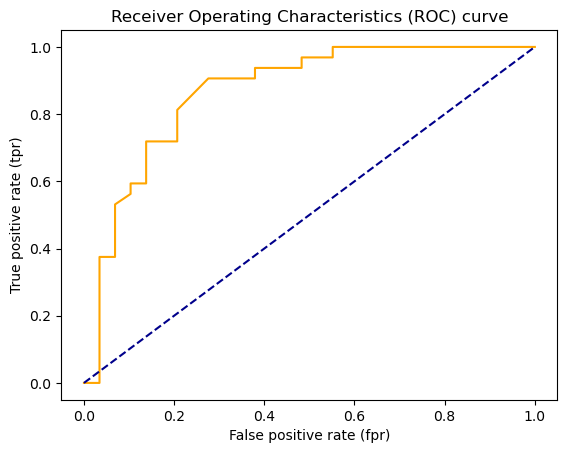

In [97]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    
    #plot line with no predicitive power (baseline)
    plt.plot([0,1],[0,1], color = "darkblue", linestyle="--", label="guessing")
    
    #customize plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.show()

plot_roc_curve(fpr,tpr)

In [98]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

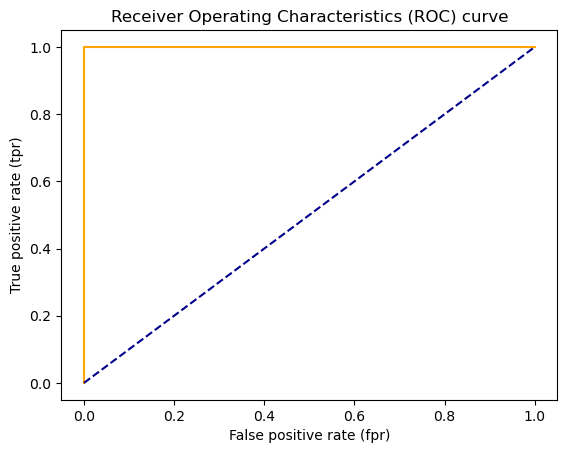

In [99]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [100]:
# perfect auc score
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual 
labels it was supposed to predict.

    In essence, giving you an idea of where the model is confused

In [101]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [102]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, 
            y_preds, 
            rownames = ["Actual label"], 
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual label,,
0,23,6
1,6,26


In [103]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.



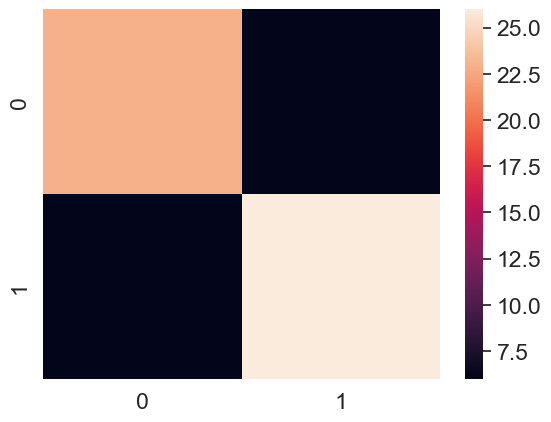

In [104]:
# Make our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

#Set font scale
sns.set(font_scale = 1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot using seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using sklearn

creating with sklearn instead of seaborn

In [105]:
import sklearn
sklearn.__version__

'1.5.1'

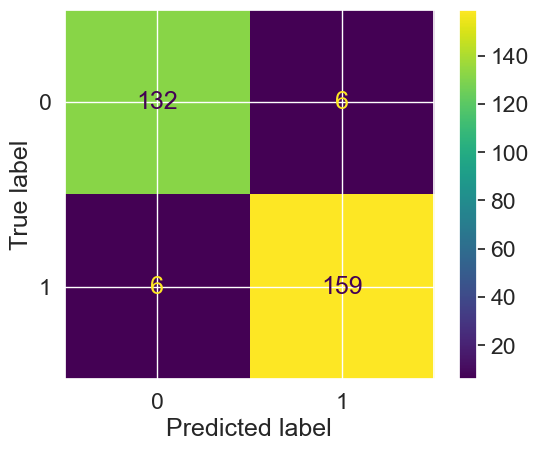

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf, X = X, y = y)

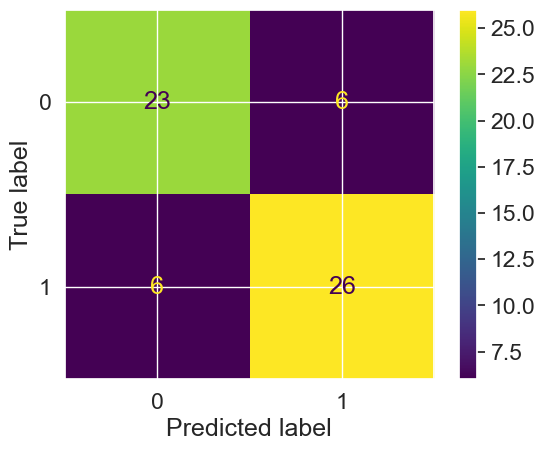

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

Classiciation Report

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [109]:
# Where precision and recall become valuable (massive class imbalance)
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case
disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/Users/kayla/Documents/Udemy/ML_data/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kayla/Documents/Udemy/ML_data/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kayla/Documents/Udemy/ML_data/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation

1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [110]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis =1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [111]:
model.score(X_test, y_test)

0.8066196804802649

In [112]:
y_test.mean(), y_test

(2.0550030959302323,
 20046    0.47700
 3024     0.45800
 15663    5.00001
 20484    2.18600
 9814     2.78000
           ...   
 15362    2.63300
 16623    2.66800
 18086    5.00001
 2144     0.72300
 3665     1.51500
 Name: MedHouseVal, Length: 4128, dtype: float64)

In [113]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [114]:
r2_score(y_true=y_test, y_pred = y_test_mean)

0.0

In [115]:
r2_score(y_true = y_test, y_pred = y_test)

1.0

In [116]:
y_preds = model.predict(X_test)
r2_score(y_test, y_preds)

0.8066196804802649

** Mean absolute error MAE **
average of the absolute differences between predicitions and absolute values

Gives an idea of how wrong the model's predictions are

In [117]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [118]:
df = pd.DataFrame(data={"actual values":y_test,
                        "predicted values": y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [119]:
# MAE using formulas
np.abs(df['differences']).mean()

0.3265721842781009

**Mean Squared error MSE**
MSE is the mean of the square of the errors between actual and predicted values

In [120]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [121]:
df['sq_diff'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,sq_diff
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [122]:
# Calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

0.2534073069137548

In [123]:
df_large_error = df.copy()
df_large_error.loc[20046,"sq_diff"] = 16

In [124]:
df_large_error.head()

,actual values,predicted values,differences,sq_diff
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [125]:
#calculate MSE with large error 
df_large_error["sq_diff"].mean()

0.25728320720794084

In [126]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,sq_diff
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [127]:
df_large_error["sq_diff"].mean()

0.7333540351264799

### 4.2.3 Finally using the `scoring` parameter

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [129]:
np.random.seed(42)

# cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring = None, estimators default scoring eval metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [130]:
# cross validated accuracy 
print(f"The cross-validated accuray is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuray is: 82.48%


In [131]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [132]:
print(f"The cross-validated accuray is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuray is: 82.48%


In [133]:
# precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [134]:
#cross validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [135]:
# recall 
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [136]:
#cross validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


In [137]:
# cross validated f1 score
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [138]:
#cross validated f1 scoure
print(f"The cross-validated f1 score is: {np.mean(cv_f1)}")

The cross-validated f1 score is: 0.8426854603423344


Let's see the `scoring` parameter being used for regression problem

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop('MedHouseVal',axis=1)
y = housing_df['MedHouseVal']

model = RandomForestRegressor()

In [140]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [141]:
# mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.48487437131782957

In [142]:
# mean squared error
cv_mse = cross_val_score(model,X,y,cv=3,scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.461228671470042

### 4.3 Using Different evaluation metrics as Scikit-Learn functions

The thrid way to evaluate sklearn ML models/estimators is to use `sklearn.metrics` module

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier methods on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier methods on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [150]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Regressor methods on the test set")
print(f"r2 score: {r2_score(y_test,y_preds)}")
print(f"mean absolute error: {mean_absolute_error(y_test,y_preds)}")
print(f"mean squared error: {mean_squared_error(y_test,y_preds)}")

Regressor methods on the test set
r2 score: 0.8066196804802649
mean absolute error: 0.3265721842781009
mean squared error: 0.2534073069137548


## 5. Improving a model
First predictions = baseline predictions
first model = baseline model

From a data perspective:
* Could we collect more data? (generally the more data the better)
* Could we improve the data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs parameters
* Parameters = model finds these patterns in data
* hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparams
1. by hand
2. randomly with RandomSearchCV
3. exhaustively with GridSearchCV

In [151]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [152]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 tuning hyperparams by hand

Let's make 3 sets - train, validation, test

we're going to try to adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [172]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy":round(accuracy, 4),
                "precision":round(precision, 2),
                "recall": round(recall, 2),
                "f1" : round(f1, 2)}
    print(f"Accuracy: {metric_dict['accuracy'] * 100}%")
    print(f"Precision: {metric_dict['precision']}")
    print(f"Recall: {metric_dict['recall']}")
    print(f"F1: {metric_dict['f1']}")

    return metric_dict

In [206]:
# by hand
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_di_shuffled = heart_disease.sample(frac=1)

#split into X and y
X = heart_di_shuffled.drop('target', axis=1)
y = heart_di_shuffled['target']

#split the data into train, validation & test sets
train_split = round(0.7 * len(heart_di_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_di_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#make predictions
y_preds = clf.predict(X_valid)

# evalue the classifier on validation set
shuffled_set_metrics = evaluate_preds(y_valid, y_preds)
shuffled_set_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.8222, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [207]:
# create baseline on default hyperparameter for later comparison (do not use hand shuffled data for comparison - different data)
np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# make and fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

baseline_metrics = evaluate_preds(y_test, y_preds)

Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


In [208]:
np.random.seed(42)

#create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_2.fit(X_train, y_train)

# make predicitons with different hyperparameters
y_preds_2 = clf_2.predict(X_test)

# eval 2nd classifier
clf_2_metrics = evaluate_preds(y_test, y_preds_2)

Accuracy: 83.61%
Precision: 0.84
Recall: 0.84
F1: 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [212]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5,10, 20, 30],
        "max_features": ["log2", "sqrt"], 
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1,2,4]}

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions = grid, 
                            n_iter = 10, #number of models to try
                            cv = 5, 
                            verbose = 2,
                           random_state = 42, # similar to random seed set for reproducibility
                            refit = True) # refit best model on full data
                           

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

In [213]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

In [214]:
# Make predictions with the best hyperparameters

rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 86.89%
Precision: 0.85
Recall: 0.91
F1: 0.88


### 5.3 Hyperparameter tuning with GridSearchCV

In [187]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [215]:
grid_2 = {'n_estimators': [50, 100, 150],
        'max_depth': [30, None],
         'max_features': ['log2', 'sqrt'],
         'min_samples_split': [2],
         'min_samples_leaf': [1, 2, 4]}

In [216]:
from sklearn.model_selection import GridSearchCV, train_test_split

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GidSearchCV
gs_clf = GridSearchCV(estimator = clf, 
                            param_grid = grid_2, 
                            cv = 5, 
                            verbose = 2,
                             refit = True)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

In [217]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [218]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 83.61%
Precision: 0.84
Recall: 0.84
F1: 0.84


Let's compare our different model's metrics

<Axes: >

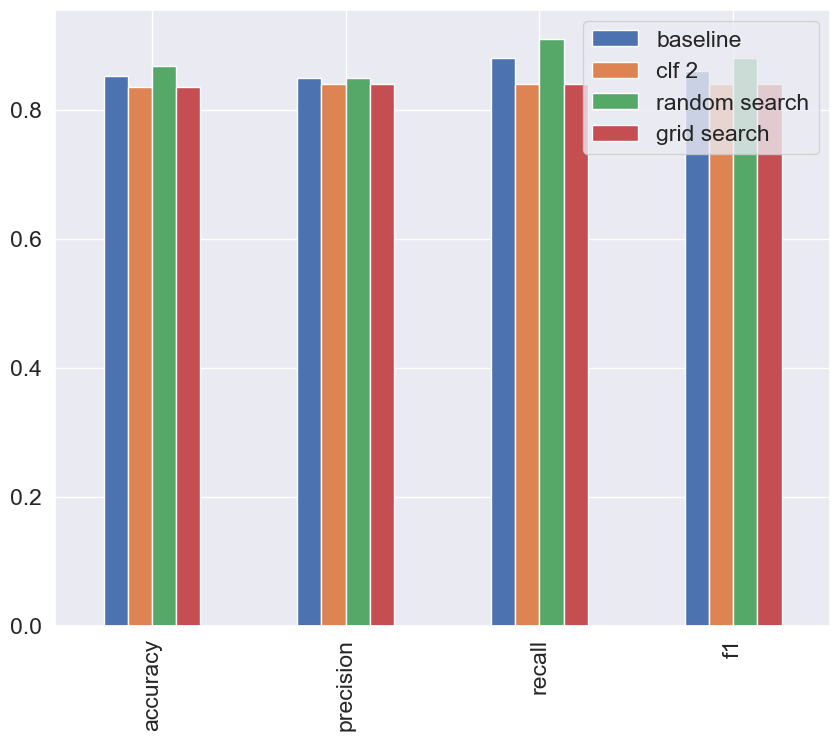

In [220]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf 2": clf_2_metrics,
                                "random search" : rs_metrics,
                                "grid search" : gs_metrics})

compare_metrics.plot.bar(figsize=[10,8])

## 6. Saving and loading trained ML models

two ways to save and load ML models
1. pythons `pickle` module
2. `joblib` module

In [221]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [222]:
# load a saved model with pickle

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [223]:
#Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 83.61%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.8361, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

**Joblib**

In [224]:
from joblib import dump, load

# save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [225]:
# load a joblib model 
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [226]:
#make and eval joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)

evaluate_preds(y_test, joblib_y_preds)

Accuracy: 83.61%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.8361, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

## 7.0 Putting it all together

In [230]:
data = pd.read_csv("sklearn_data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [233]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [234]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we need to take (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [239]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#set up random seed
import numpy as np
np.random.seed(42)

#import data nd drop rows with missing labels
data = pd.read_csv("sklearn_data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#Define different features and transformer popeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "constant", fill_value=4))])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy= "mean"))])

#set up preprocessing steps (fill missing values and convert to numbers)
preprocessor = ColumnTransformer(
    transformers = [
        ("cat", categorical_transformer,categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# create preprocessing and modeling pipeline
model = Pipeline(steps = [ ("preprocessor", preprocessor),
                         ("model", RandomForestRegressor())])

#split data
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [243]:
# Use GridSearchCV with our Regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["log2"],
    "model__min_samples_split": [2,4] }

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=log2, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['log2'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [244]:
gs_model.score(X_test,y_test)

0.2970584538514702